# Semantic Similarity with LED

Transformer-based models are unable to process long sequences due to their self-attention operation, which scales quadratically with the sequence length. To address this limitation, we introduce the Longformer with an attention mechanism that scales linearly with sequence length, making it easy to process documents of thousands of tokens or longer. (Iz Beltagy, Matthew E. Peters, Arman Cohan.)

Reference documentation: https://huggingface.co/docs/transformers/model_doc/led

Reference notebook: https://colab.research.google.com/drive/12LjJazBl7Gam0XBPy_y0CTOJZeZ34c2v?usp=sharing#scrollTo=tLM3niQqhEzP

## Setup

In [1]:
!pip install --no-cache-dir transformers sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 325.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 174.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 152.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 182.3 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as f

from transformers import BigBirdTokenizer, BigBirdModel

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
bigbird_version = "l-yohai/bigbird-roberta-base-mnli"
#tokenizer = LEDTokenizer.from_pretrained(led_version)
tokenizer = BigBirdTokenizer.from_pretrained(bigbird_version)
model = BigBirdModel.from_pretrained(bigbird_version)



##Data

In [5]:
texts  = [
    '''


Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational

Special identifier identifier Float
Special identifier identifier Float
Special identifier identifier Float
Special identifier identifier Integer
Special identifier identifier Float
Special identifier identifier Float

Special identifier identifier Float
Special identifier identifier Float

Special identifier identifier Float
Special identifier identifier Integer
Special identifier identifier Integer

keyword identifier Special keyword Special keyword Arithmetic Arithmetic identifier Special keyword Arithmetic Arithmetic Special keyword Arithmetic Arithmetic Special keyword Arithmetic Arithmetic Special ;
keyword identifier Special keyword Arithmetic Special ;
keyword identifier Special keyword keyword Arithmetic Special keyword Arithmetic Arithmetic Special keyword Arithmetic Arithmetic Special ;
keyword identifier Special keyword identifier Arithmetic Special keyword Arithmetic Special ;
keyword identifier Special keyword identifier Arithmetic Special ;
keyword identifier Special keyword Special keyword Arithmetic Special keyword Arithmetic Special keyword Arithmetic Special keyword Arithmetic Special ;
keyword identifier Special keyword Special ;
keyword identifier Special keyword keyword keyword Arithmetic Special keyword keyword Arithmetic Special ;
keyword identifier Special keyword Arithmetic Special ;
keyword identifier Special keyword Special keyword Arithmetic Special keyword Arithmetic Special keyword Arithmetic Special keyword Arithmetic Special ;




keyword Special keyword identifier Special keyword Arithmetic identifier Special Special Special
Special
keyword identifier Special identifier Special ;
keyword Arithmetic identifier ;
identifier Arithmetic identifier ;
keyword identifier ;
keyword identifier ;

keyword Arithmetic identifier ;
keyword Arithmetic identifier ;
keyword Arithmetic identifier ;
keyword Arithmetic identifier ;
keyword identifier identifier ;
keyword ;




identifier Special identifier Special identifier Special Bitwise identifier Special Bitwise identifier Special Bitwise identifier Special ;
identifier Special identifier Special Bitwise identifier Special Bitwise identifier Special ;

keyword Special identifier Special Bitwise identifier Special identifier Special Relational identifier Special
identifier Special identifier Special ;

Assignment identifier Special Bitwise identifier Special ;

identifier Assignment identifier Special identifier Special "identifier "Special ;
keyword Special identifier Relational identifier Special
Special
identifier Special identifier Special "identifier identifier Arithmetic identifier \identifier "Special identifier Special ;
identifier Special identifier Special ;
Special

identifier Assignment Float ;

keyword Special identifier Special
Special


identifier Arithmetic ;
identifier Assignment identifier Special identifier Special "Arithmetic identifier "Special identifier Special ;
keyword Special identifier Relational identifier Special
keyword ;

identifier Assignment identifier Special Special identifier Special identifier Special identifier Special identifier Special ;
keyword Special identifier Relational identifier Special
Special
identifier Special "identifier identifier identifier Arithmetic identifier identifier :Arithmetic identifier "Special
identifier Special identifier Special ;
identifier Special identifier Special ;
Special
keyword keyword Special identifier Relational identifier Special
Special


Special Special ;
Assignment identifier Special Bitwise identifier Special ;
identifier Assignment identifier Special Special identifier Special identifier Special identifier Special identifier Special ;
keyword Special identifier Relational identifier Special
Special
identifier Special "identifier identifier identifier Arithmetic identifier identifier :Arithmetic identifier "Special
identifier Special identifier Special ;
identifier Special identifier Special ;
Special
Special
Special


identifier Special "identifier identifier identifier identifier identifier identifier \identifier "Special ;
identifier Special identifier Special ;

Special





keyword identifier Special keyword Special keyword Arithmetic identifier Special keyword Arithmetic identifier Special
keyword Arithmetic identifier Special keyword Arithmetic identifier Special
Special
keyword identifier ;

identifier Special Special identifier Special identifier Special identifier Special identifier Special ;
identifier Assignment identifier Special Special ;

keyword Special identifier Relational identifier Special
keyword identifier ;
keyword keyword Special identifier Relational identifier Special
keyword identifier ;
keyword keyword Special identifier Relational identifier Special
identifier Special identifier Special "identifier Arithmetic identifier identifier identifier identifier \identifier "Special identifier Special ;

keyword identifier ;
Special




keyword identifier Special keyword identifier Special keyword Arithmetic identifier Special Special Special keyword Arithmetic Arithmetic identifier Special keyword Arithmetic Arithmetic identifier Special
keyword Arithmetic Arithmetic identifier Special
Special
keyword Special identifier Relational Float Special
Special
identifier Special identifier Float Special Special ;
identifier Float Special ;
Special

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Special identifier Float Special Arithmetic Float Special Special ;
identifier Special Arithmetic identifier Special identifier Float Special Special ;

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Special identifier Float Special Arithmetic Float Special Special ;
identifier Special Arithmetic identifier Special identifier Float Special Special ;

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Special identifier Float Special Arithmetic Float Special Special ;
identifier Special Arithmetic identifier Special identifier Float Special Special ;

Special






keyword identifier Special keyword Arithmetic identifier Special
Special
identifier Special identifier Special "identifier :\identifier "Special ;
identifier Special identifier Special "Arithmetic identifier identifier identifier identifier \identifier "Special identifier Special ;
Special





keyword identifier Special keyword keyword Arithmetic identifier Special keyword Arithmetic Arithmetic identifier Special keyword Arithmetic Arithmetic identifier Special
Special
keyword Arithmetic identifier ;
keyword Arithmetic identifier ;


identifier Assignment identifier Special identifier Special "
keyword Special identifier Relational identifier Special
identifier Assignment Special keyword Arithmetic Special identifier ;
keyword
identifier Assignment identifier Arithmetic Float ;


identifier Assignment identifier Special identifier Special "Arithmetic "Special ;
keyword Special identifier Relational identifier Special
Special
identifier Special identifier Special "identifier identifier \identifier "Special ;
identifier Special identifier Special ;
Special

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Arithmetic identifier Float Special ;
identifier Special Arithmetic identifier Special identifier Special identifier Arithmetic identifier Special ;
Special Arithmetic identifier Special Special identifier Arithmetic identifier Special Assignment Char ;

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Special identifier Float Special Special ;
identifier Special Arithmetic identifier Special identifier Special ;

Special





keyword identifier Special keyword Special keyword Arithmetic identifier Special keyword Arithmetic identifier Special keyword Arithmetic identifier Special
keyword Arithmetic identifier Special
Special
keyword identifier Special identifier Special ;
keyword keyword identifier Special identifier Special ;
keyword keyword identifier Special identifier Special ;




identifier Special Special keyword Arithmetic Special identifier Special "Arithmetic identifier :Arithmetic identifier "Special identifier Special identifier Special ;
identifier Special identifier Special identifier Special ;

identifier Special identifier Special "identifier Arithmetic identifier identifier Float Float \identifier :Arithmetic identifier \identifier :Arithmetic identifier \identifier \identifier "Special
identifier Special identifier Special identifier Special ;

keyword Special identifier Special Special identifier Special identifier Special identifier Special Special Relational Float Special
Special
identifier Special ""Special ;
identifier Special identifier Special ;
Special

Special




keyword identifier Special Special
Special
keyword identifier Special identifier Special ;
keyword identifier Float Special ;
keyword identifier ;
keyword Arithmetic identifier ;
keyword identifier Float Special ;
keyword identifier ;



identifier Assignment Special Special identifier Special identifier Float Special ;
identifier Special identifier Special Assignment Char ;



identifier Special identifier Special identifier Special Float Special ;
identifier Float Special Assignment Char ;
keyword Special identifier Special identifier Special "identifier "Special Relational Float Special
Special
identifier Assignment Special Special identifier Special identifier Special ;
Special

keyword Special identifier Relational Float Special
Special
identifier Special ""Special ;
identifier Special identifier Special ;
Special
keyword keyword Special identifier Relational Float Special
Special

keyword identifier ;
Special


identifier Assignment identifier Special identifier Special ""Special ;
keyword Special identifier Relational identifier Special
Special
identifier Special "identifier identifier identifier identifier identifier \identifier "Special ;
identifier Special identifier Special ;
Special
identifier Arithmetic ;

identifier Special identifier Special identifier Special Float Special ;
identifier Float Special Assignment Char ;
identifier Assignment identifier Special identifier Special ;

keyword identifier ;
Special




keyword identifier Special keyword identifier Arithmetic identifier Special keyword Arithmetic identifier Special
Special
keyword identifier ;
keyword identifier Arithmetic identifier ;
keyword identifier Float Special ;


identifier Special identifier Special Float Special keyword Special Arithmetic identifier Special Special ;
identifier Arithmetic Relational identifier Assignment identifier Float Special ;



keyword Special Special identifier Assignment identifier Special identifier Special Special Relational Float Special
Special
identifier Arithmetic Relational identifier Assignment identifier ;
identifier Arithmetic Relational identifier Special identifier Assignment identifier ;
Special
keyword keyword Special Special identifier Assignment identifier Special identifier Special Special Relational identifier Special
Special
identifier Arithmetic Relational identifier Assignment identifier Arithmetic Relational identifier ;
identifier Special Special keyword Arithmetic Special Bitwise identifier Arithmetic Relational identifier Special
Special keyword Arithmetic Special identifier Arithmetic Relational identifier Special identifier Arithmetic Relational identifier Special ;
Special
keyword
Special
identifier Special identifier Special ;
identifier Special "Arithmetic identifier :Arithmetic identifier \identifier "Special identifier Special identifier Special ;
keyword identifier ;
Special

keyword identifier ;
Special






keyword identifier Special keyword identifier Arithmetic identifier Special
Special
keyword ;


keyword Special Special Assignment identifier Special identifier Special identifier Special Float Special Special Relational Float Special
Special
identifier Special ""Special ;
identifier Special identifier Special ;
Special




keyword Special identifier Special Special Special keyword identifier Arithmetic Special identifier Special keyword Special Arithmetic identifier Special Special Relational Float Special
Special
identifier Special ""Special ;
identifier Special identifier Special ;
Special

keyword ;
Special





keyword identifier Special keyword keyword keyword Arithmetic identifier Special keyword keyword Arithmetic identifier Special
Special
keyword keyword keyword Arithmetic identifier Assignment
"identifier Arithmetic Arithmetic ";

keyword identifier ;
keyword identifier ;
keyword identifier ;
keyword keyword Arithmetic identifier ;
keyword identifier ;
keyword identifier ;
keyword identifier ;

identifier Assignment identifier ;
identifier Assignment identifier Special Special keyword Arithmetic Special identifier Special ;



identifier Assignment Float Arithmetic Special identifier Arithmetic Float Special ;
keyword Special identifier Assignment Float ;identifier Relational identifier ;identifier Assignment Float Special
Special
Arithmetic identifier Arithmetic Assignment identifier Special identifier Float Special Bitwise Float Special ;
Arithmetic identifier Arithmetic Assignment identifier Special Special Special identifier Float Special Bitwise Float Special Bitwise Float Special Arithmetic Special identifier Float Special Bitwise Float Special Special ;
Arithmetic identifier Arithmetic Assignment identifier Special Special Special identifier Float Special Bitwise Float identifier Special Bitwise Float Special Arithmetic Special identifier Float Special Bitwise Float Special Special ;
Arithmetic identifier Arithmetic Assignment identifier Special identifier Float Special Bitwise Float identifier Special ;
identifier Assignment Float ;
Special




keyword Special identifier Relational identifier Special
Special
identifier Assignment identifier Float Special ;
identifier Assignment Special identifier Float Relational identifier Special Ternary identifier Float Special :Float ;
identifier Assignment Float ;

Arithmetic identifier Arithmetic Assignment identifier Special identifier Bitwise Float Special ;
Arithmetic identifier Arithmetic Assignment identifier Special Special Special identifier Bitwise Float Special Bitwise Float Special Arithmetic Special identifier Bitwise Float Special Special ;
Arithmetic identifier Arithmetic Assignment Special identifier Float Relational identifier Special Ternary identifier Special Special Special identifier Bitwise Float identifier Special Bitwise Float Special Arithmetic Special identifier Bitwise Float Special Special :Char ;
Arithmetic identifier Arithmetic Assignment Char ;
Special


Arithmetic identifier Assignment Char ;

Special





keyword identifier Special keyword Arithmetic identifier Special
Special
keyword Special identifier Special
Special
identifier :
identifier Special identifier Special "identifier identifier identifier identifier identifier "Special ;
keyword ;

identifier :
identifier Special identifier Special "identifier identifier identifier identifier identifier identifier Special identifier identifier identifier identifier identifier "Special ;
keyword ;

identifier :
identifier Special identifier Special "identifier identifier Arithmetic identifier identifier identifier identifier identifier "Special ;
keyword ;

identifier :
identifier Special identifier Special "identifier identifier identifier identifier identifier identifier identifier Special identifier identifier identifier Special "Special ;
keyword ;

keyword :
identifier Special identifier Special "identifier identifier identifier identifier identifier Special "Special ;
Special
Special

    ''',
    '''



Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Arithmetic identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational

Special identifier identifier Float
Special identifier identifier Float
Special identifier identifier Float
Special identifier identifier Integer
Special identifier identifier Float
Special identifier identifier Float

Special identifier identifier Float
Special identifier identifier Float
Special identifier identifier Integer


keyword Arithmetic identifier ;
keyword Arithmetic identifier ;
keyword ;
keyword Arithmetic identifier ;
keyword Arithmetic identifier ;
keyword identifier ;
keyword identifier identifier ;


keyword identifier Special keyword Special keyword Arithmetic Arithmetic identifier Special keyword Arithmetic Arithmetic Special keyword Arithmetic Arithmetic Special ;
keyword identifier Special keyword Arithmetic Special ;
keyword identifier Special keyword keyword Arithmetic Special keyword Arithmetic Arithmetic Special keyword Arithmetic Arithmetic Special ;
keyword identifier Special Special ;
keyword identifier Special Special ;
keyword identifier Special keyword Special keyword Arithmetic Special keyword Arithmetic Special keyword Arithmetic Special keyword Arithmetic Special ;
keyword identifier Special keyword Special ;
keyword identifier Special keyword keyword keyword Arithmetic Special keyword keyword Arithmetic Special ;
keyword identifier Special keyword Arithmetic Special ;
keyword identifier Special keyword Arithmetic Special keyword Special ;
keyword identifier Special keyword Arithmetic Special ;




keyword identifier Special keyword identifier Special keyword Arithmetic identifier Special Special Special
Special
keyword identifier Special identifier Float Special ;
keyword identifier ;



identifier Assignment Float ;
identifier Special identifier Special identifier Special Bitwise identifier Special Bitwise identifier Special ;
identifier Special identifier Special Bitwise identifier Special Bitwise identifier Special ;

identifier Special Special ;
Assignment identifier Special Special ;



keyword Special identifier Float ;identifier Relational identifier ;identifier Arithmetic Special
Special
identifier Special identifier Special Float Special identifier Float Special ;
identifier Special identifier Special identifier Special ;
Special

identifier Special "identifier identifier identifier identifier identifier identifier \identifier "Special ;
identifier Special identifier Special ;

Special




keyword identifier Special keyword Arithmetic identifier Special keyword identifier Special
Special
keyword keyword keyword Arithmetic identifier Assignment
"identifier ";

keyword identifier ;
keyword identifier ;

identifier Assignment identifier Special identifier Special ;
identifier Arithmetic ;

keyword Special identifier Float ;identifier Relational identifier Special identifier Special ;identifier Arithmetic Special
Special
identifier Special identifier Float Special Assignment identifier Special identifier Special ;

keyword Special identifier Special identifier Special Relational identifier Special
Special

identifier Special identifier Special identifier Special ;
Special
keyword
Special
identifier Special identifier Special ;
Special

identifier Special identifier Special Assignment Char ;
Special
Special




keyword identifier Special keyword Arithmetic identifier Special
Special
keyword identifier ;

identifier Arithmetic ;


identifier :
identifier Special Special identifier Special identifier Special identifier Special identifier Special ;
identifier Assignment identifier Special Special ;

keyword Special identifier Relational identifier Special
Special
identifier Special "identifier identifier identifier identifier identifier identifier Arithmetic identifier identifier :Arithmetic identifier \identifier "Special
identifier Special identifier Special ;
identifier Special identifier Special ;
Special
keyword keyword Special identifier Relational identifier Special
Special

Special Special ;
Assignment identifier Special Special ;
keyword identifier ;
Special
keyword keyword Special identifier Relational identifier Special
Special
identifier Special "identifier Arithmetic identifier identifier identifier identifier \identifier "Special identifier Special ;
identifier Special identifier Special ;
Special

Special




keyword identifier Special keyword identifier Special keyword Arithmetic identifier Special Special Special keyword Arithmetic Arithmetic identifier Special keyword Arithmetic Arithmetic identifier Special
Special
keyword Special identifier Relational Float Special
Special
identifier Special identifier Float Special Special ;
identifier Float Special ;
Special

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Special identifier Float Special Arithmetic Float Special Special ;
identifier Special Arithmetic identifier Special identifier Float Special Special ;

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Special identifier Float Special Arithmetic Float Special Special ;
identifier Special Arithmetic identifier Special identifier Float Special Special ;

Special





keyword identifier Special keyword Arithmetic identifier Special
Special
identifier Special identifier Special "identifier :\identifier "Special ;
identifier Special identifier Special "Arithmetic identifier identifier identifier \identifier "Special identifier Special ;
Special




keyword identifier Special keyword keyword Arithmetic identifier Special keyword Arithmetic Arithmetic identifier Special keyword Arithmetic Arithmetic identifier Special
Special
keyword Arithmetic identifier ;
keyword Arithmetic identifier ;


identifier Assignment identifier Special identifier Special "
keyword Special identifier Relational identifier Special
identifier Assignment Special keyword Arithmetic Special identifier ;
keyword
identifier Assignment identifier Arithmetic Float ;


identifier Assignment identifier Special identifier Special "Arithmetic "Special ;
keyword Special identifier Relational identifier Special
Special
identifier Special identifier Special "identifier identifier \identifier "Special ;
identifier Special identifier Special ;
Special

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Arithmetic identifier Float Special ;
identifier Special Arithmetic identifier Special identifier Special identifier Arithmetic identifier Special ;
Special Arithmetic identifier Special Special identifier Arithmetic identifier Special Assignment Char ;

Arithmetic identifier Assignment Special keyword Arithmetic Special identifier Special identifier Special identifier Float Special Special ;
identifier Special Arithmetic identifier Special identifier Special ;

Special




keyword identifier Special keyword Special keyword Arithmetic identifier Special keyword Arithmetic identifier Special keyword Arithmetic identifier Special
keyword Arithmetic identifier Special
Special
keyword identifier Special identifier Special ;
keyword keyword identifier Special identifier Special ;
keyword keyword identifier Special identifier Special ;




identifier Special Special keyword Arithmetic Special identifier Special "Arithmetic identifier :Arithmetic identifier "Special identifier Special identifier Special ;
identifier Special identifier Special identifier Special ;

identifier Special identifier Special "identifier Arithmetic identifier identifier Float Float \identifier :Arithmetic identifier \identifier :Arithmetic identifier \identifier \identifier "Special
identifier Special identifier Special identifier Special ;

keyword Special identifier Special Special identifier Special identifier Special identifier Special Special Relational Float Special
Special
identifier Special ""Special ;
identifier Special identifier Special ;
Special
Special




keyword identifier Special Special
Special
keyword identifier Special identifier Special ;
keyword identifier ;
keyword Arithmetic identifier ;
keyword identifier Float Special ;
keyword identifier ;



keyword Special identifier Special
Special
identifier Assignment Special Special identifier Special identifier Float Special ;
keyword Special identifier Relational Float Special
Special
identifier Special ""Special ;
identifier Special identifier Special ;
Special
keyword keyword Special identifier Relational Float Special
Special

keyword identifier ;
Special

identifier Special identifier Float Special Assignment Char ;


identifier Assignment identifier Special identifier Special "identifier "Special ;
keyword Special identifier Relational identifier Special
Special
identifier Assignment identifier Arithmetic Float ;
keyword ;
Special
Special

identifier Special identifier Special identifier Special Float Special ;
identifier Float Special Assignment Char ;
identifier Assignment identifier Special identifier Special ;

keyword identifier ;
Special




keyword identifier Special Special
Special
keyword ;

keyword Special Special Assignment identifier Special identifier Special identifier Special Float Special Special Relational Float Special
Special
identifier Special ""Special ;
identifier Special identifier Special ;
Special

keyword Special identifier Special Special Special keyword identifier Arithmetic Special Bitwise identifier Special keyword Special identifier Special Special Relational Float Special
Special
identifier Special "identifier "Special ;
identifier Special identifier Special ;
Special

keyword ;
Special




keyword identifier Special Special
Special
keyword identifier Arithmetic identifier ;
keyword identifier ;
keyword identifier Special identifier Special ;




identifier Special Bitwise identifier Special Float Special keyword Special identifier Special Special ;
identifier Special identifier Assignment identifier Float Special ;


keyword Special Special identifier Assignment identifier Special identifier Special Special Relational Float Special
Special
identifier Special identifier Assignment identifier ;
identifier Special identifier Special identifier Assignment identifier ;
Special
keyword keyword Special Special identifier Assignment identifier Special identifier Special Special Relational identifier Special
Special
identifier Special identifier Assignment identifier Arithmetic Relational identifier ;
identifier Special Special keyword Arithmetic Special Bitwise identifier Special identifier Special
Special keyword Arithmetic Special identifier Arithmetic Relational identifier Special identifier Arithmetic Relational identifier Special ;
Special
keyword
Special
identifier Special identifier Special ;
identifier Special "Arithmetic identifier :Arithmetic identifier \identifier "Special identifier Special identifier Special ;
identifier Special identifier Special ;
Special
Special




keyword identifier Special keyword keyword keyword Arithmetic identifier Special keyword keyword Arithmetic identifier Special
Special
keyword keyword keyword Arithmetic identifier Assignment
"identifier Arithmetic Arithmetic ";

keyword identifier ;
keyword identifier ;
keyword identifier ;
keyword keyword Arithmetic identifier ;
keyword identifier ;
keyword identifier ;
keyword identifier ;

identifier Assignment identifier ;
identifier Assignment identifier Special Special keyword Arithmetic Special identifier Special ;



identifier Assignment Float Arithmetic Special identifier Arithmetic Float Special ;
keyword Special identifier Assignment Float ;identifier Relational identifier ;identifier Assignment Float Special
Special
Arithmetic identifier Arithmetic Assignment identifier Special identifier Float Special Bitwise Float Special ;
Arithmetic identifier Arithmetic Assignment identifier Special Special Special identifier Float Special Bitwise Float Special Bitwise Float Special Arithmetic Special identifier Float Special Bitwise Float Special Special ;
Arithmetic identifier Arithmetic Assignment identifier Special Special Special identifier Float Special Bitwise Float identifier Special Bitwise Float Special Arithmetic Special identifier Float Special Bitwise Float Special Special ;
Arithmetic identifier Arithmetic Assignment identifier Special identifier Float Special Bitwise Float identifier Special ;
identifier Assignment Float ;
Special




keyword Special identifier Relational identifier Special
Special
identifier Assignment identifier Float Special ;
identifier Assignment Special identifier Float Relational identifier Special Ternary identifier Float Special :Float ;
identifier Assignment Float ;

Arithmetic identifier Arithmetic Assignment identifier Special identifier Bitwise Float Special ;
Arithmetic identifier Arithmetic Assignment identifier Special Special Special identifier Bitwise Float Special Bitwise Float Special Arithmetic Special identifier Bitwise Float Special Special ;
Arithmetic identifier Arithmetic Assignment Special identifier Float Relational identifier Special Ternary identifier Special Special Special identifier Bitwise Float identifier Special Bitwise Float Special Arithmetic Special identifier Bitwise Float Special Special :Char ;
Arithmetic identifier Arithmetic Assignment Char ;
Special


Arithmetic identifier Assignment Char ;

Special




keyword identifier Special keyword Arithmetic identifier Special
Special
keyword Special identifier Special
Special
identifier :
identifier Special identifier Special "identifier identifier identifier identifier identifier "Special ;
keyword ;

identifier :
identifier Special identifier Special "identifier identifier identifier identifier identifier identifier Special identifier identifier identifier identifier identifier "Special ;
keyword ;

identifier :
identifier Special identifier Special "identifier identifier Arithmetic identifier identifier identifier identifier identifier "Special ;
keyword ;

identifier :
identifier Special identifier Special "identifier identifier identifier identifier identifier identifier identifier Special identifier identifier identifier Special "Special ;
keyword ;

keyword :
identifier Special identifier Special "identifier identifier identifier identifier identifier Special "Special ;
Special
Special

    ''',
    '''

Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier identifier Float



keyword identifier Special keyword Arithmetic identifier Special identifier Arithmetic identifier Special
Special
keyword identifier Special identifier Float Special identifier ;
keyword identifier Special identifier Special Special identifier Special identifier Special Special identifier Special identifier Special ;
keyword identifier ;

identifier Special identifier Special "identifier Arithmetic identifier Arithmetic identifier Assignment Arithmetic identifier Arithmetic identifier Assignment "Special ;
identifier Special identifier Special "identifier :
identifier Special identifier Special ""Special ;

keyword Special Special identifier Assignment identifier Special identifier Special Special Relational identifier Special
Special
identifier Float ;
keyword Special identifier Float ;identifier Relational identifier ;identifier Arithmetic Special
identifier Special identifier Special Assignment Char ;
keyword Special identifier Float ;identifier Relational identifier ;identifier Arithmetic Special
identifier Special identifier Special Assignment Char ;



keyword Special identifier Relational Char Special
Special

identifier Special identifier Special Assignment identifier ;
identifier Arithmetic ;
identifier Assignment identifier Special identifier Special ;
Special



keyword Special identifier Special identifier Special Relational Integer Special
Special
identifier Special identifier Special identifier Special ;
identifier Special identifier Special identifier Special ;
identifier Special identifier Special identifier Special ;
identifier Special "identifier identifier identifier Arithmetic identifier \identifier "Special identifier Special ;
identifier Assignment identifier Special identifier Special ;

keyword Special identifier Relational Integer Special
keyword Float ;
keyword
identifier Special identifier Special ""Special ;
identifier Special identifier Special ""Special ;
Special
Special

keyword Float ;

Special

keyword Special keyword identifier Special keyword Arithmetic identifier Special Special Special
Special
identifier Arithmetic identifier ;
keyword identifier Float Special Special identifier Special identifier Special ;
keyword identifier Special identifier ;




keyword Special identifier ;
Assignment identifier Special Special ;

keyword Special identifier Relational Float Special
Special
identifier Special "identifier identifier identifier :Special Arithmetic Relational identifier Relational Relational identifier identifier Relational "Special ;
identifier Float Special ;
Special
identifier Assignment identifier Special identifier Float Special Special "identifier "Special ;

keyword Special identifier Relational identifier Special
Special
identifier Special "identifier identifier identifier identifier "Special ;
identifier Float Special ;
Special
keyword Special identifier Float ;identifier Float ;identifier Arithmetic Special
Special
identifier Special identifier Special Assignment Char ;
Special

identifier Assignment identifier Special identifier Special identifier Special ;
identifier Special "\identifier identifier Arithmetic identifier \identifier "Special identifier Special ;
identifier Special Special ;
identifier Assignment identifier Special Special ;
identifier Special "identifier identifier Assignment Arithmetic identifier identifier \identifier "Special Special identifier Arithmetic Special Arithmetic Special Special Special ;
keyword Special identifier Special ;
Special



    ''',
    '''
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier Relational identifier Special identifier Relational
Special identifier identifier Float



keyword identifier Special keyword Arithmetic identifier Special identifier Arithmetic identifier Special
Special
keyword identifier Special identifier Float Special identifier ;
keyword identifier Special identifier Special Special identifier Special identifier Special Special identifier Special identifier Special ;
keyword identifier ;

identifier Special identifier Special "identifier Arithmetic identifier Arithmetic identifier Assignment Arithmetic identifier Arithmetic identifier Assignment "Special ;
identifier Special identifier Special "identifier :
identifier Special identifier Special ""Special ;

keyword Special Special identifier Assignment identifier Special identifier Special Special Relational identifier Special
Special
identifier Float ;
keyword Special identifier Float ;identifier Relational identifier ;identifier Arithmetic Special
identifier Special identifier Special Assignment Char ;
keyword Special identifier Float ;identifier Relational identifier ;identifier Arithmetic Special
identifier Special identifier Special Assignment Char ;



keyword Special identifier Relational Char Special
Special

identifier Special identifier Special Assignment identifier ;
identifier Arithmetic ;
identifier Assignment identifier Special identifier Special ;
Special



keyword Special identifier Special identifier Special Relational Integer Special
Special
identifier Special identifier Special identifier Special ;
identifier Special identifier Special identifier Special ;
identifier Special identifier Special identifier Special ;
identifier Special "identifier identifier identifier Arithmetic identifier \identifier "Special identifier Special ;
identifier Assignment identifier Special identifier Special ;

keyword Special identifier Relational Integer Special
keyword Float ;
keyword
identifier Special identifier Special ""Special ;
identifier Special identifier Special ""Special ;
Special
Special

keyword Float ;

Special

keyword Special keyword identifier Special keyword Arithmetic identifier Special Special Special
Special
identifier Arithmetic identifier ;
keyword identifier Float Special Special identifier Special identifier Special ;
keyword identifier Special identifier ;




keyword Special identifier ;
Assignment identifier Special Special ;

keyword Special identifier Relational Float Special
Special
identifier Special "identifier identifier identifier :Special Arithmetic Relational identifier Relational Relational identifier identifier Relational "Special ;
identifier Float Special ;
Special
identifier Assignment identifier Special identifier Float Special Special "identifier "Special ;

keyword Special identifier Relational identifier Special
Special
identifier Special "identifier identifier identifier identifier "Special ;
identifier Float Special ;
Special
keyword Special identifier Float ;identifier Float ;identifier Arithmetic Special
Special
identifier Special identifier Special Assignment Char ;
Special

identifier Assignment identifier Special identifier Special identifier Special ;
identifier Special "\identifier identifier Arithmetic identifier \identifier "Special identifier Special ;
identifier Special Special ;
identifier Assignment identifier Special Special ;
identifier Special "identifier identifier Assignment Arithmetic identifier identifier \identifier "Special Special identifier Arithmetic Special Arithmetic Special Special Special ;
keyword Special identifier Special ;
Special


'''
]

##Encoding (or second tokenization)

In [6]:
encodings = tokenizer(texts, return_tensors='pt',
        padding=True,
        truncation=True)

In [7]:
encodings

{'input_ids': tensor([[ 65, 321, 100,  ..., 321, 100,  66],
        [ 65, 321, 100,  ...,   0,   0,   0],
        [ 65, 321, 100,  ...,   0,   0,   0],
        [ 65, 321, 100,  ...,   0,   0,   0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [8]:
encodings = encodings.to(device)

In [9]:
for tokens in encodings['input_ids']:
    print(tokenizer.convert_ids_to_tokens(tokens))

['[CLS]', '▁', '<unk>', 'Special', '▁identifier', '▁Rel', 'ational', '▁identifier', '▁Special', '▁identifier', '▁Rel', 'ational', '▁', '<unk>', 'Special', '▁identifier', '▁Rel', 'ational', '▁identifier', '▁Special', '▁identifier', '▁Rel', 'ational', '▁', '<unk>', 'Special', '▁identifier', '▁Rel', 'ational', '▁identifier', '▁Special', '▁identifier', '▁Rel', 'ational', '▁', '<unk>', 'Special', '▁identifier', '▁Rel', 'ational', '▁identifier', '▁Special', '▁identifier', '▁Rel', 'ational', '▁', '<unk>', 'Special', '▁identifier', '▁Rel', 'ational', '▁identifier', '▁Special', '▁identifier', '▁Rel', 'ational', '▁', '<unk>', 'Special', '▁identifier', '▁Rel', 'ational', '▁identifier', '▁Special', '▁identifier', '▁Rel', 'ational', '▁', '<unk>', 'Special', '▁identifier', '▁Rel', 'ational', '▁identifier', '▁Ar', 'ithmetic', '▁identifier', '▁Special', '▁identifier', '▁Rel', 'ational', '▁', '<unk>', 'Special', '▁identifier', '▁Rel', 'ational', '▁identifier', '▁Ar', 'ithmetic', '▁identifier', '▁Specia

## Embedding (pass through LED model)

Get the embeddings without recalculating the gradients (is faster :D)

In [10]:
with torch.no_grad():
    embeds = model(**encodings)

In [11]:
embeds

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.2634,  0.1553, -0.0340,  ...,  0.2238,  0.0226, -0.3113],
         [ 0.1636, -0.1027, -0.1887,  ...,  0.2006,  0.0709, -0.2016],
         [ 0.3977, -0.4207, -0.0781,  ...,  0.4698,  0.3217,  0.0714],
         ...,
         [ 0.2796, -0.1519, -0.2684,  ..., -0.1777, -0.2423, -0.4499],
         [ 0.3973, -0.2809, -0.1059,  ...,  0.0490, -0.1621, -0.0864],
         [ 0.1888,  0.0445,  0.0185,  ...,  0.1727, -0.0109, -0.1895]],

        [[ 0.3432,  0.1326,  0.0173,  ...,  0.2732,  0.0633, -0.1915],
         [ 0.1931, -0.1179, -0.2026,  ...,  0.2470,  0.1279, -0.1512],
         [ 0.6444, -0.4096, -0.0077,  ...,  0.2909,  0.2690,  0.1277],
         ...,
         [ 0.0323,  0.0112,  0.0387,  ..., -0.1184,  0.0484, -0.0535],
         [ 0.0391,  0.0034,  0.0457,  ..., -0.0872,  0.0387, -0.0488],
         [ 0.0370, -0.0092,  0.0438,  ..., -0.0711,  0.0470, -0.0487]],

        [[ 0.2847,  0.3016, -0.0021,  ...,  0.2432, -

In [12]:
embeds[0]

tensor([[[ 0.2634,  0.1553, -0.0340,  ...,  0.2238,  0.0226, -0.3113],
         [ 0.1636, -0.1027, -0.1887,  ...,  0.2006,  0.0709, -0.2016],
         [ 0.3977, -0.4207, -0.0781,  ...,  0.4698,  0.3217,  0.0714],
         ...,
         [ 0.2796, -0.1519, -0.2684,  ..., -0.1777, -0.2423, -0.4499],
         [ 0.3973, -0.2809, -0.1059,  ...,  0.0490, -0.1621, -0.0864],
         [ 0.1888,  0.0445,  0.0185,  ...,  0.1727, -0.0109, -0.1895]],

        [[ 0.3432,  0.1326,  0.0173,  ...,  0.2732,  0.0633, -0.1915],
         [ 0.1931, -0.1179, -0.2026,  ...,  0.2470,  0.1279, -0.1512],
         [ 0.6444, -0.4096, -0.0077,  ...,  0.2909,  0.2690,  0.1277],
         ...,
         [ 0.0323,  0.0112,  0.0387,  ..., -0.1184,  0.0484, -0.0535],
         [ 0.0391,  0.0034,  0.0457,  ..., -0.0872,  0.0387, -0.0488],
         [ 0.0370, -0.0092,  0.0438,  ..., -0.0711,  0.0470, -0.0487]],

        [[ 0.2847,  0.3016, -0.0021,  ...,  0.2432, -0.0342, -0.1071],
         [ 0.1596,  0.0069, -0.2563,  ...,  0

In [14]:
embeds[0].shape

torch.Size([4, 2836, 768])

## Calculate Cosine Similarity

In [13]:
def visualize(distances, figsize=(10, 5), titles=None):
    # get the number of columns
    ncols = len(distances)
    # create the subplot placeholders
    fig, ax = plt.subplots(ncols=ncols, figsize=figsize)

    for i in range(ncols):

        # get the axis in which we will draw the matrix
        axes = ax[i] if ncols > 1 else ax

        # get the i-th distance
        distance = distances[i]

        # create the heatmap
        axes.imshow(distance)

        # show the ticks
        axes.set_xticks(np.arange(distance.shape[0]))
        axes.set_yticks(np.arange(distance.shape[1]))

        # set the tick labels
        axes.set_xticklabels(np.arange(distance.shape[0]))
        axes.set_yticklabels(np.arange(distance.shape[1]))

        # set the values in the heatmap
        for j in range(distance.shape[0]):
            for k in range(distance.shape[1]):
                text = axes.text(k, j, str(round(distance[j, k], 3)),
                               ha="center", va="center", color="w")

        # set the title of the subplot
        title = titles[i] if titles and len(titles) > i else "Text Distance"
        axes.set_title(title, fontsize="x-large")

    fig.tight_layout()
    plt.show()

In [15]:
CLSs = embeds[0][:, 0, :]

In [16]:
# normalize the CLS token embeddings
normalized = f.normalize(CLSs, p=2, dim=1)
# calculate the cosine similarity
cls_dist = normalized.matmul(normalized.T)
cls_dist = cls_dist.new_ones(cls_dist.shape) - cls_dist
cls_dist = cls_dist.numpy()

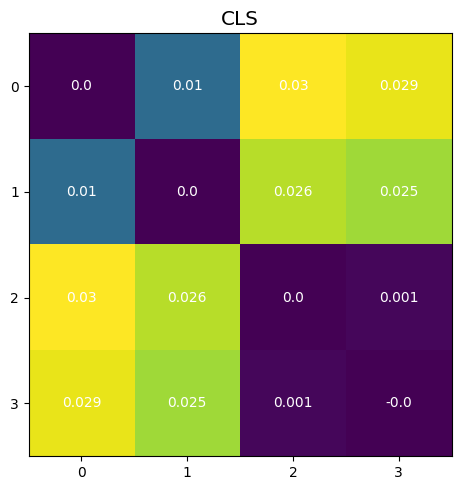

In [17]:
visualize([cls_dist], titles=["CLS"])